In [2]:
import pandas as pd
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import plotly.express as px
from IPython.display import HTML, Image
import utils_profe
from collections import Counter
from scipy.stats import chi2_contingency

In [3]:
path = '../../data/WineQT.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
print(df.shape)
df.info()

(1143, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## Limpieza de datos con Python:

### **Verificación y ajuste de tipos de datos** 

Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [4]:
df.head().T

,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


NO hay nulos

In [6]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': []


La estructura estan con tipos de datos "primitivos"

### **Detección y eliminación de valores duplicados** 

Asegúrate de que cada registro en el dataset sea único

In [8]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


NO existen datos categoricos.

### **Detección de datos anómalos:**

Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [12]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils_profe.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
fixed acidity,44.0,3.849519,4.6000,12.000
volatile acidity,14.0,1.224847,0.1200,1.005
citric acid,1.0,0.087489,0.0000,0.790
residual sugar,110.0,9.623797,0.9000,3.650
chlorides,77.0,6.736658,0.0410,0.119
free sulfur dioxide,18.0,1.574803,1.0000,42.000
total sulfur dioxide,40.0,3.499563,6.0000,121.000
density,36.0,3.149606,0.9922,1.001
pH,20.0,1.749781,2.9200,3.690
sulphates,43.0,3.762030,0.3300,0.990


In [13]:
df[numerical_columns].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## **Exploración de datos con Python**

### **Visualizaciones exploratorias univariadas**

Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código

#### Histograma de variables numéricas

**Hipótesis extraída**

* La mayoría de las personas son clientes relativamente nuevos y se les cobra un fee mensual bajo

**Análisis descriptivo que la justifica**

* Como podemos ver en los histogramas, la distribución del tiempo en meses que el cliente lleva con la compañia tiene sus peak en clientes con menos de 6 meses y también en clientes que llevan mucho tiempo (más de 70). Esto sugiere que podemos crear categorías intesantes si agrupamos varios meses que hagan sentido de negocio. En este caso en particular podríamos usar los quartiles o alguna generación arbitraria con criteruos de negocio como esta:
    * Recién adquiridos: 0 meses
    * Nuevos: 1 a 6 meses
    * Relativamente nuevos: 7 a 12 meses
    * Antiguo: 13 meses a 24 meses
    * 25 meses o más: consolidado   

* Los cargos mensuales muestran una distribución peaks en valores menores a los 25 USD, luego se aplana pero vuelve a incrementar levemente su frecuencia sobre los 40 USD. Esto sugiere que podríamos agrupar creando al menos 3 categorías distintas o bien usar los quartiles.

* Los cargos totales realizados a cada cliente muestran una clara distribucón con sesgo a los valores bajos, lo que va en linea con que la mayoría de las personas son clientes relativamente nuevos y se les cobra un fee mensual bajo

* PD: los rangos finales en caso de crear agrupaciones de valores también podemos definirlos en función de alguna variable de interés de la cual queramos estudiar el efecto.

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

C:\Users\edgar\AppData\Local\Temp\ipykernel_1536\1575600529.py:14: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


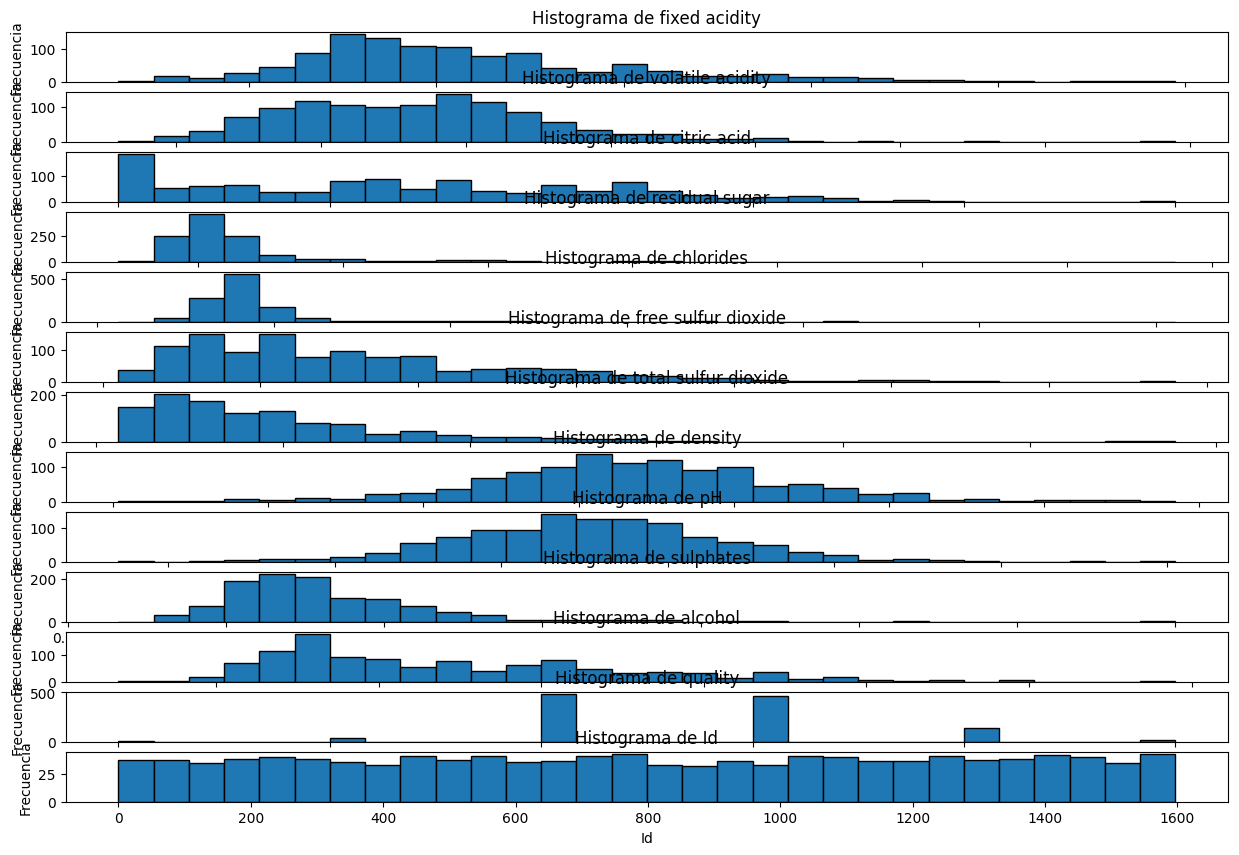

In [15]:
print(df[numerical_columns].describe())

# Configuración del tamaño de la gráfica
plt.figure(figsize=(15, 10))

# Crear un histograma para cada columna numérica
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    plt.hist(df[column].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()